<a href="https://colab.research.google.com/github/Elisha-Hart/Access-The-String-Using-Slicing-And-Indexing-Assignment/blob/main/Support_Vector_Classifier(svm)_Snippets_GridSearchCV_Printing_EDA_Report_Logistic_Regression_Model_Train_Logistic_Regression_Model_Test_predictions_knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
### Reading the data
data = pd.read_csv("/content/diabetes.csv")

In [3]:
### Data Quality Checking
def quality_check(data):
  print("Data Information Is :", data.info())
  print("Data Description Is :", data.describe())
  print("Data columns are : ", data.columns)
  print("The null counts are: ", data.isnull().sum())

In [4]:
print("The quality report of the data is as follows \n", quality_check(data))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
Data Information Is : None
Data Description Is :        Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.

In [5]:
index = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).index


In [6]:
data["Pregnancies"].astype(object)

0       6
1       1
2       8
3       1
4       0
       ..
763    10
764     2
765     5
766     1
767     1
Name: Pregnancies, Length: 768, dtype: object

In [7]:
data["Pregnancies"].astype(object).value_counts().sort_values(ascending= False)

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [8]:
data["Pregnancies"].astype(object).value_counts().sort_values(ascending= False).head(10)

1    135
0    111
2    103
3     75
4     68
5     57
6     50
7     45
8     38
9     28
Name: Pregnancies, dtype: int64

In [9]:
data["Pregnancies"].astype(object).value_counts().sort_values(ascending= False).head(10).index

Int64Index([1, 0, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')

In [10]:
data["Pregnancies"].astype(object).value_counts().sort_values(ascending= False).head(10).values

array([135, 111, 103,  75,  68,  57,  50,  45,  38,  28])

In [11]:
data["Pregnancies"].astype(object).value_counts()

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

In [12]:
def plot_categorical_data(index, values):
  plt.figure(figsize = [20,8])
  plt.subplot(1,2,1)
  plt.pie(x = values, labels = index, autopct='%1.0f%%')
  plt.subplot(1,2,2)
  sns.barplot(y = index, x = values, orient = "h")
  plt.grid();
  plt.show()

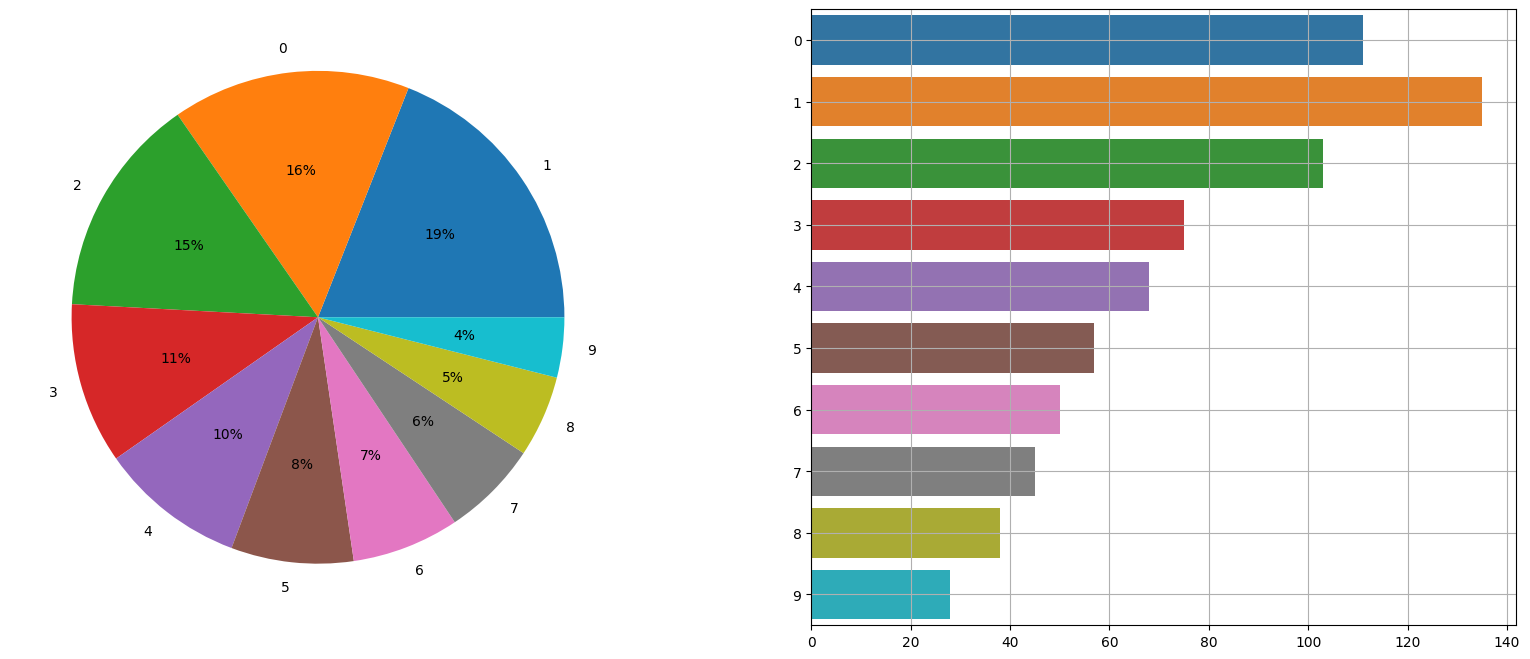

In [13]:
index = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).index
values = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).values
plot_categorical_data(index, values)

In [14]:
def plot_continious_data(data, col):
  plt.figure(figsize = [20,8])
  plt.subplot(1,2,1)
  plt.hist(data)
  plt.subplot(1,2,2)
  sns.boxplot(y = col, data=data)
  plt.grid();
  plt.show();

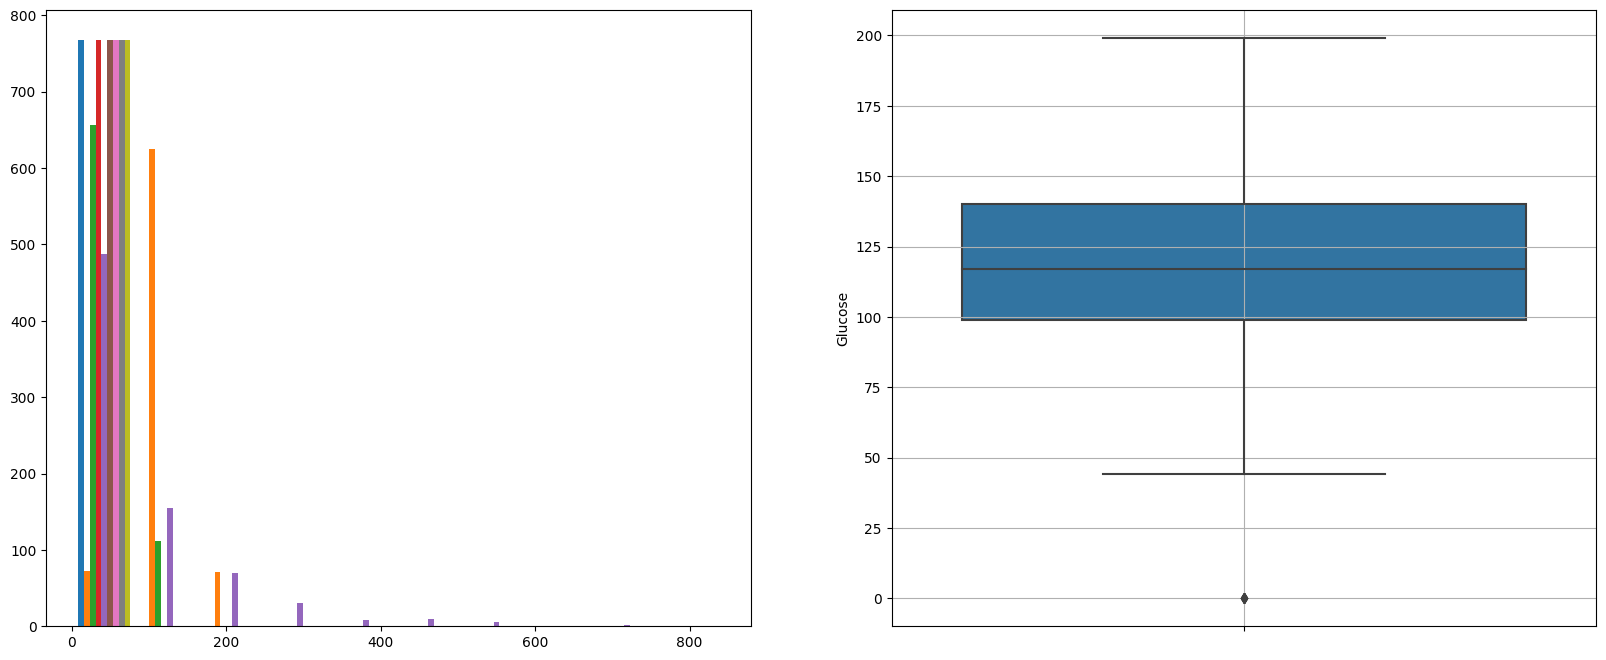

In [15]:
plot_continious_data (data, "Glucose")

In [16]:
def separate_categorical_continious(data):
  categorical_features , continious_features = [] , []
  for col in data.columns:
    if data[col].dtypes == "object":
      categorical_features.append(col)
    else:
      continious_features.append(col)
  return categorical_features , continious_features

def plot_categorical_data(index, values):
  plt.figure(figsize = [20, 8])
  plt.subplot(1,2,1)
  plt.pie(x = values, labels = index, autopct= '%1.0f%%')
  plt.subplot(1,2,2)
  sns.barplot(y = index, x = values, orient = "h")
  plt.grid();
  plt.show();

def plot_continious_data(data, col):
  plt.figure(figsize = [20,8])
  plt.subplot(1,2,1)
  sns.histplot(data, x = col)
  plt.subplot(1,2,2)
  sns.boxplot(y = col, data=data)
  plt.grid();
  plt.show();

def univariate_data_analysis(data):
  #categorical_features , continious_features = separate_categorical_continious(data)
  #for col in categorical_features:
    print("Categorical Plots Done")
    index = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).index
    values = data["Pregnancies"].astype(object).value_counts().sort_values(ascending = False).head(10).values
    print(plot_categorical_data(index = index, values = values))

    #for col in continious_features:
      #print(plot_continious_data(data, col))


EDA Report: 
Categorical Plots Done


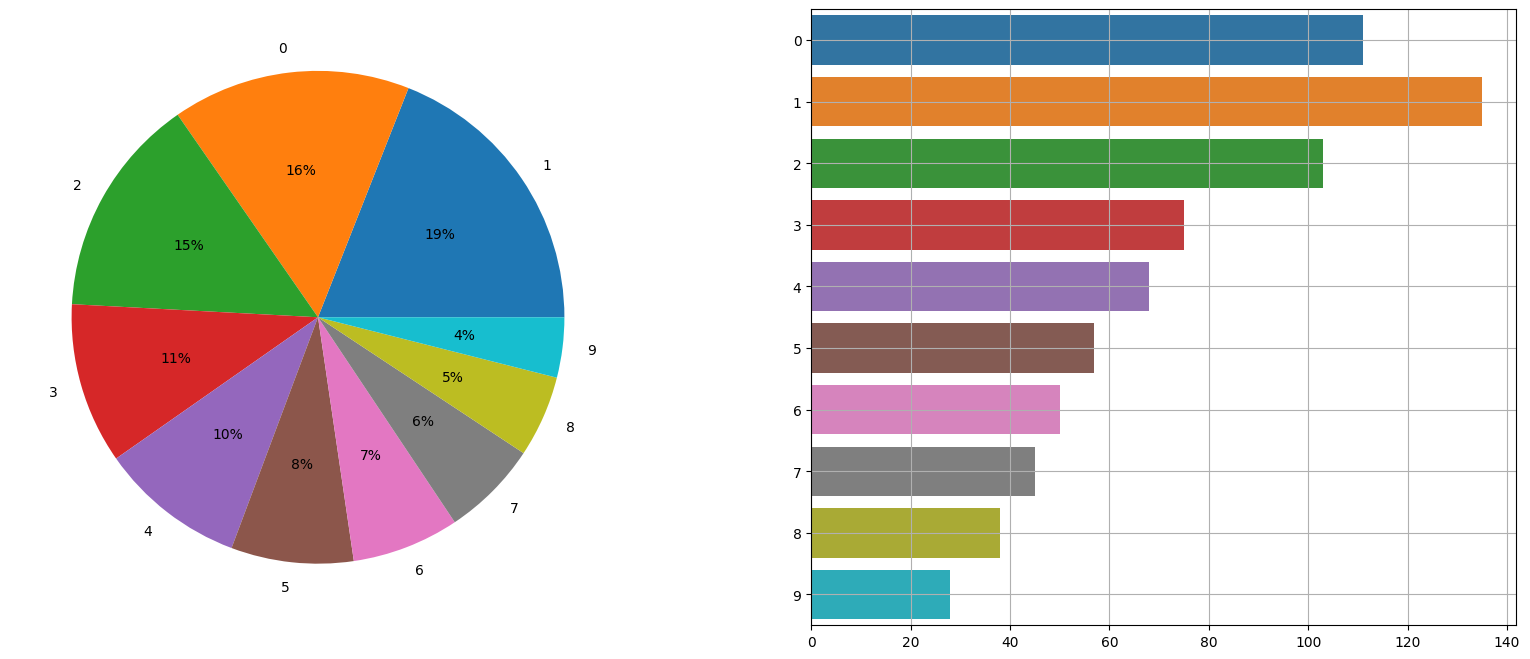

None


In [17]:
print("EDA Report: ")
univariate_data_analysis(data)

In [18]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [19]:
data.BMI

0      33.6
1      26.6
2      23.3
3      28.1
4      43.1
       ... 
763    32.9
764    36.8
765    26.2
766    30.1
767    30.4
Name: BMI, Length: 768, dtype: float64

In [20]:
data['Insulin']

0        0
1        0
2        0
3       94
4      168
      ... 
763    180
764      0
765    112
766      0
767      0
Name: Insulin, Length: 768, dtype: int64

In [21]:
data['Insulin'].max()

846

In [22]:
data['Insulin'].min()

0

In [23]:
data.groupby(by = ['Pregnancies'])['Age'].count()

Pregnancies
0     111
1     135
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
13     10
14      2
15      1
17      1
Name: Age, dtype: int64

In [24]:
data.groupby(by = ['Pregnancies'])['Age'].mean()

Pregnancies
0     27.603604
1     27.370370
2     27.194175
3     29.026667
4     32.779412
5     39.035088
6     39.340000
7     41.111111
8     45.368421
9     44.178571
10    42.666667
11    44.545455
12    47.444444
13    44.500000
14    42.000000
15    43.000000
17    47.000000
Name: Age, dtype: float64

In [25]:
data.groupby(by = ['Pregnancies'])['Age'].mean().index

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17], dtype='int64', name='Pregnancies')

In [26]:
data.groupby(by = ['Pregnancies']) ['Age'].mean().values

array([27.6036036 , 27.37037037, 27.19417476, 29.02666667, 32.77941176,
       39.03508772, 39.34      , 41.11111111, 45.36842105, 44.17857143,
       42.66666667, 44.54545455, 47.44444444, 44.5       , 42.        ,
       43.        , 47.        ])

In [27]:
number_of_children = data.groupby(by = ['Pregnancies']) ['Age'].mean().index
average_ages = data.groupby(by = ['Pregnancies']) ['Age'].mean().values

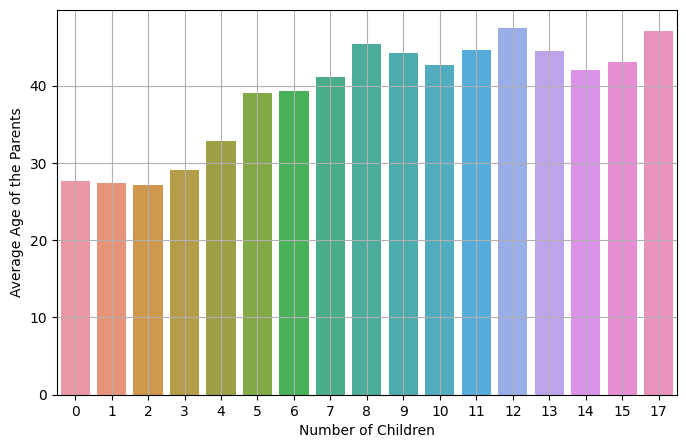

In [28]:
number_of_children = data.groupby(by = ['Pregnancies'])['Age'].mean().index
average_ages = data.groupby(by = ['Pregnancies'])['Age'].mean().values
plt.figure(figsize = [8,5])
sns.barplot(x = number_of_children,y = average_ages)
plt.xlabel("Number of Children")
plt.ylabel("Average Age of the Parents")
plt.grid()
plt.show();

In [29]:
data.groupby(by = ['Outcome'])['Pregnancies'].count()

Outcome
0    500
1    268
Name: Pregnancies, dtype: int64

In [30]:
outcome_data = data['Outcome'].astype(object)
pregnancy_data = data['Pregnancies'].astype(object)

In [31]:
data["Pregnancies_obj"] = pregnancy_data
data["outcome_data"] = outcome_data

In [32]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_obj,outcome_data
0,6,148,72,35,0,33.6,0.627,50,1,6,1
1,1,85,66,29,0,26.6,0.351,31,0,1,0
2,8,183,64,0,0,23.3,0.672,32,1,8,1
3,1,89,66,23,94,28.1,0.167,21,0,1,0
4,0,137,40,35,168,43.1,2.288,33,1,0,1


In [33]:
data.groupby(by = ['outcome_data'])['Pregnancies_obj'].count()

outcome_data
0    500
1    268
Name: Pregnancies_obj, dtype: int64

In [34]:
data.groupby(by = ['Pregnancies_obj', 'outcome_data',])['Pregnancies_obj'].count()

Pregnancies_obj  outcome_data
0                0                73
                 1                38
1                0               106
                 1                29
2                0                84
                 1                19
3                0                48
                 1                27
4                0                45
                 1                23
5                0                36
                 1                21
6                0                34
                 1                16
7                0                20
                 1                25
8                0                16
                 1                22
9                0                10
                 1                18
10               0                14
                 1                10
11               0                 4
                 1                 7
12               0                 5
                 1                 4
13      

<Axes: xlabel='count', ylabel='Pregnancies_obj'>

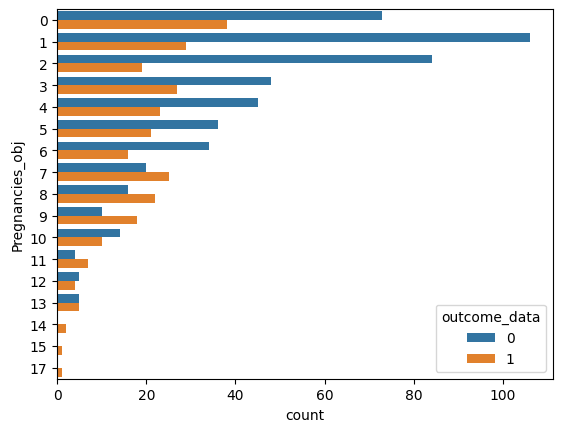

In [35]:
sns.countplot(y = 'Pregnancies_obj' , data = data, hue = 'outcome_data')

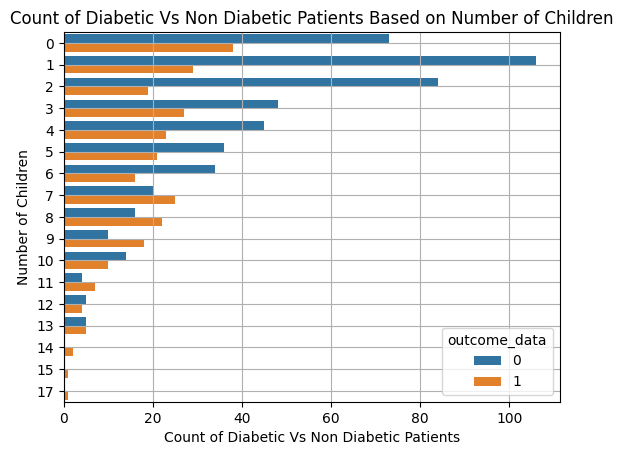

In [36]:
sns.countplot(y = 'Pregnancies_obj', data = data , hue = 'outcome_data')
plt.ylabel("Number of Children")
plt.xlabel("Count of Diabetic Vs Non Diabetic Patients")
plt.title("Count of Diabetic Vs Non Diabetic Patients Based on Number of Children")
plt.grid()
plt.show();

In [37]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_obj',
       'outcome_data'],
      dtype='object')

In [38]:
data.groupby(by = ['Pregnancies_obj', 'outcome_data'])['BMI'].median()

Pregnancies_obj  outcome_data
0                0               32.40
                 1               37.00
1                0               28.20
                 1               36.50
2                0               29.70
                 1               32.90
3                0               29.60
                 1               33.30
4                0               31.30
                 1               32.30
5                0               31.90
                 1               35.60
6                0               29.90
                 1               30.85
7                0               30.95
                 1               35.50
8                0               29.90
                 1               32.80
9                0               31.05
                 1               32.85
10               0               29.45
                 1               33.65
11               0               36.10
                 1               36.60
12               0               3

In [39]:
np.median(data['BMI'])

32.0

<Axes: xlabel='BMI', ylabel='Count'>

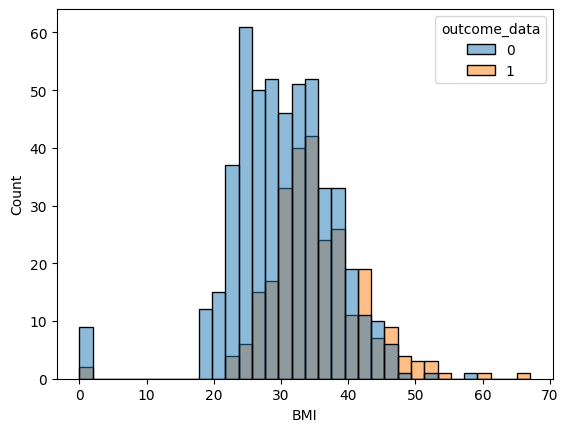

In [40]:
sns.histplot(x = 'BMI', data=data, hue = "outcome_data")

In [41]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Pregnancies_obj',
       'outcome_data'],
      dtype='object')

In [42]:
data.drop(['Pregnancies_obj', 'outcome_data'], axis = 1, inplace = True)
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [43]:
from sklearn.model_selection import train_test_split as tts
X,y = data.drop(["Outcome"], axis = 1), data["Outcome"]

In [44]:
X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.25)

In [45]:
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [46]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

In [47]:
# Begin the Logistic Regression Training
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
predictions_log_reg = log_reg.predict(X_test)

In [49]:
# Training the KNN Model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [50]:
predictions_knn = knn.predict(X_test)

In [51]:
results_df = pd.DataFrame({"Actual_Predictions":y_test,
                           "log_reg_predictions":predictions_log_reg,
                           "KNN_predictions":predictions_knn})

In [52]:
results_df

,Actual_Predictions,log_reg_predictions,KNN_predictions
652,0,0,0
221,1,1,1
93,1,0,0
464,0,0,0
53,1,1,1
...,...,...,...
591,0,0,0
433,0,0,0
763,0,0,1
382,0,0,0


In [53]:
from sklearn.metrics import accuracy_score

In [54]:
print("The accuracy score for logistic model is :", accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100)

The accuracy score for logistic model is : 76.04166666666666


In [55]:
print("The accuracy score for logistic regression model in test is:",
      accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100)

The accuracy score for logistic regression model in test is: 76.04166666666666


In [56]:
from sklearn.metrics import classification_report, confusion_matrix

In [57]:
#print("The accuracy score for KNN model in train is:" ,
      #accuracy_score(results_train_df["Actual_Data_train"],results_train_df["KNN_predictions_train"])*100)

print("The accuracy score for KNN model in test is:" , 
      accuracy_score(results_df["Actual_Predictions"],results_df["KNN_predictions"])*100)


The accuracy score for KNN model in test is: 69.79166666666666


<Axes: >

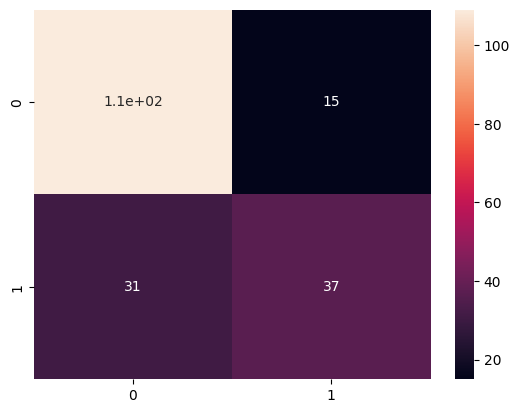

In [58]:
sns.heatmap(confusion_matrix(results_df["Actual_Predictions"],results_df["log_reg_predictions"]), annot = True)

In [59]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [60]:
from sklearn.model_selection import train_test_split as tts
X,y = data.drop(["Outcome"], axis = 1), data["Outcome"]

In [61]:
X_train,x_test,y_train,y_test = tts(X,y , test_size = 0.25)

In [62]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((576, 8), (192, 8), (576,), (192,))

In [63]:
from sklearn.linear_model import LogisticRegression
log_reg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [64]:
# Training the KNN model
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [65]:
predictions_knn = knn.predict(X_test)

In [66]:
pd.DataFrame({"Actual_Predictions":y_test,
              "log_reg_predictions":predictions_log_reg,
              "KNN_predictions":predictions_knn})

,Actual_Predictions,log_reg_predictions,KNN_predictions
175,1,0,0
562,0,1,1
89,0,0,0
663,1,0,0
357,1,1,1
...,...,...,...
568,0,0,0
738,0,0,0
39,1,0,0
718,0,0,0


In [67]:
results_df

,Actual_Predictions,log_reg_predictions,KNN_predictions
652,0,0,0
221,1,1,1
93,1,0,0
464,0,0,0
53,1,1,1
...,...,...,...
591,0,0,0
433,0,0,0
763,0,0,1
382,0,0,0


In [68]:
from sklearn.metrics import accuracy_score

In [69]:
print("The accuracy score for logistic regression model is:" , accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100)

The accuracy score for logistic regression model is: 76.04166666666666


In [70]:
predictions_log_reg_train = log_reg.predict(X_train)
predictions_knn_train = knn.predict(X_train)

In [71]:
results_train_df = pd.DataFrame({"Actual_Data_train":y_train,
                                 "log_reg_predictions_train":predictions_log_reg_train,
                                 "KNN_predictions_train":predictions_knn_train})

In [72]:
results_train_df

,Actual_Data_train,log_reg_predictions_train,KNN_predictions_train
55,0,0,0
640,0,0,0
425,1,1,1
636,0,0,0
259,1,1,1
...,...,...,...
654,0,0,0
284,1,0,0
143,1,0,1
386,1,0,1


In [73]:
results_df = pd.DataFrame({"Actual_Predictions":y_test,
                           "log_reg_predictions":predictions_log_reg,
                           "KNN_predictions":predictions_knn})

In [74]:
results_df

,Actual_Predictions,log_reg_predictions,KNN_predictions
175,1,0,0
562,0,1,1
89,0,0,0
663,1,0,0
357,1,1,1
...,...,...,...
568,0,0,0
738,0,0,0
39,1,0,0
718,0,0,0


In [75]:
from sklearn.metrics import accuracy_score

In [76]:
print("The accuracy score for logistic regression model in train is:" ,
      accuracy_score(results_train_df["Actual_Data_train"],results_train_df["log_reg_predictions_train"])*100)

The accuracy score for logistic regression model in train is: 77.25694444444444


In [77]:
print("The accuracy score for logistic regression model in test is:" ,
      accuracy_score(results_df["Actual_Predictions"],results_df["log_reg_predictions"])*100)

The accuracy score for logistic regression model in test is: 59.375


In [78]:
from sklearn.model_selection import GridSearchCV
param_grid = {'penalty':["l1", "l2", "elasticnet", None],
              'dual':[True,False]}
              

In [79]:
grid_search = GridSearchCV

In [80]:
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
iris = datasets.load_iris()
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(iris.data, iris.target)



GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [81]:
grid_search = GridSearchCV

In [82]:
param_grid


{'penalty': ['l1', 'l2', 'elasticnet', None], 'dual': [True, False]}

In [83]:
grid_search

sklearn.model_selection._search.GridSearchCV

In [84]:
grid_search.fit

<function sklearn.model_selection._search.BaseSearchCV.fit(self, X, y=None, *, groups=None, **fit_params)>

In [85]:
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


In [86]:
forest_params = [{'max_depth': list(range(10,15)), 'max_features': list(range(0,14))}]

clf.fit(X_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [87]:
best_model = LogisticRegression({'dual':False, 'penalty': '12'})

In [88]:
# Train the best model with the data
best_model.fit

<bound method LogisticRegression.fit of LogisticRegression(penalty={'dual': False, 'penalty': '12'})>

In [89]:
best_model = LogisticRegression(penalty = "12", dual=False)

In [90]:
best_model.fit

<bound method LogisticRegression.fit of LogisticRegression(penalty='12')>

In [91]:
from sklearn.metrics import accuracy_score


In [92]:
print(accuracy_score)

<function accuracy_score at 0x7f8e31f4f520>


In [93]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [94]:
X_train, X_test, y_train, y_test 

(     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
 55             1       73             50             10        0  23.0   
 640            0      102             86             17      105  29.3   
 425            4      184             78             39      277  37.0   
 636            5      104             74              0        0  28.8   
 259           11      155             76             28      150  33.3   
 ..           ...      ...            ...            ...      ...   ...   
 654            1      106             70             28      135  34.2   
 284            2      108             80              0        0  27.0   
 143           10      108             66              0        0  32.4   
 386            5      116             74             29        0  32.3   
 132            3      170             64             37      225  34.5   
 
      DiabetesPedigreeFunction  Age  
 55                      0.248   21  
 640                  

In [95]:
rfc = RandomForestClassifier()

In [96]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features':list(range(0,14))}]

In [97]:
clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

In [98]:
clf.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [99]:
print(clf.best_params_)


{'max_depth': 13, 'max_features': 10}


In [100]:
clf.best_score_

0.7743194192377495

In [101]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [102]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 44.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 67.4 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102752 sha256=9db26f37da6e13052ddf44e8e32eff005f6ae6a0d598ad866c7554d1c99961bf
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [103]:
# https://pypi.python.org/pypi/pydot
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [104]:
# https://pypi.python.org/pypi/libarchive
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122519 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 6.9 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31629 sha256=212e96ebc7ee9e1525a80b00d6b89ac1b80fe3129b462e0a62f017b95f76b3ba
  Stored in directory: /root/.cache/pip/wheels/3a/94/d0/6cd83c8a80a4236fd4cb2a1fd846ecf72ab1e0ac238c5951c0
Successfully built libarchive


In [105]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


**Support Vector Classifier**

In [106]:
from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(X_train, y_train)
svc_predictions = model_svc.predict(X_test)

In [107]:
svc_predictions.shape

(192,)

In [108]:
svc_predictions_train = model_svc.predict(X_train)


In [109]:
accuracy_score(y_train,svc_predictions_train)*100

76.73611111111111

In [110]:
accuracy_score(y_test,svc_predictions)*100

58.854166666666664

In [111]:
y_train.value_counts()

0    370
1    206
Name: Outcome, dtype: int64

**Decision Tree Classifier**

In [112]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
dt_predictions_train = model_dt.predict(X_train)
dt_predictions = model_dt.predict(X_test)
print("Train Acc :", accuracy_score(y_train,dt_predictions_train)*100)
print("Test Acc :",accuracy_score(y_test,dt_predictions)*100)

Train Acc : 100.0
Test Acc : 59.375


In [114]:
### So far, it is overfitting
index_length = range(1,len(dt_predictions)+1)
index_length

range(1, 193)

In [115]:
index_length =range(1,len(y_train)+1)
index_length

range(1, 577)

In [116]:
y = [predictions_log_reg,accuracy_score(y_test,dt_predictions)*100, accuracy_score(y_test,svc_predictions)*100,predictions_knn]
y
#results_df = pd.DataFrame({"Actual_Predictions":y_test,
                           #"log_reg_predictions":predictions_log_reg,
                           #"KNN_predictions":predictions_knn})

[array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 59.375,
 58.854166666666664,
 array([0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 1, 1

In [118]:
df = pd.DataFrame(data)

In [119]:
pd.DataFrame({"Model Names":["log_reg_test","dt_predictions","SVM_predictions","KNN"],
              "Accuracy Score":[predictions_log_reg,accuracy_score(y_test,dt_predictions)*100 ,
                                accuracy_score(y_test,svc_predictions)*100,
                                predictions_knn,
                                
                                ]
               }
             )

,Model Names,Accuracy Score
0,log_reg_test,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, ..."
1,dt_predictions,59.375
2,SVM_predictions,58.854167
3,KNN,"[0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, ..."


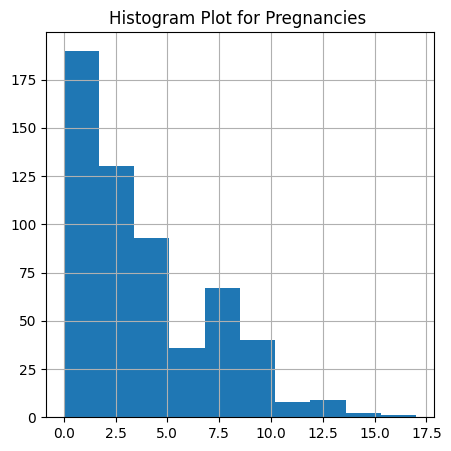

In [150]:
plt.figure(figsize = [5,5])
for col in ["Pregnancies"]:
  plt.hist(X_train[col]);
  plt.grid();
  plt.title("Histogram Plot for {} ".format(col))
  plt.show();

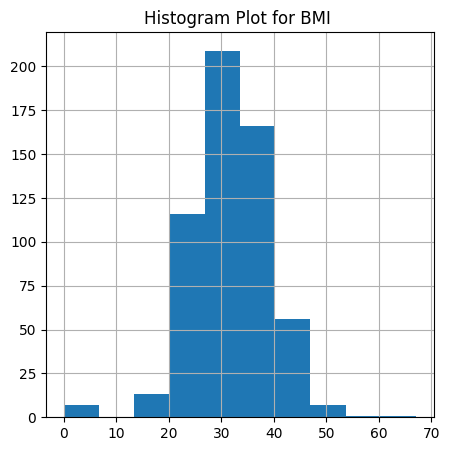

In [151]:
plt.figure(figsize = [5,5])
for col in ["BMI"]:
  plt.hist(X_train[col]);
  plt.grid();
  plt.title("Histogram Plot for {} ".format(col))
  plt.show();

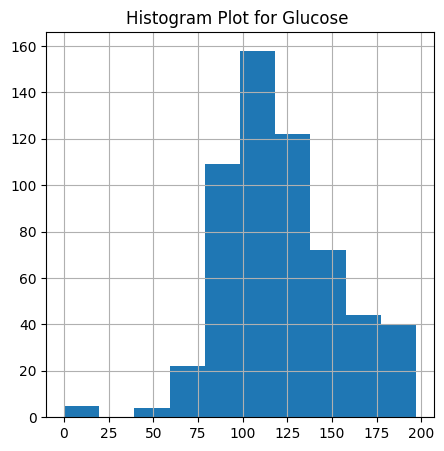

In [152]:
plt.figure(figsize = [5,5])
for col in ["Glucose"]:
  plt.hist(X_train[col]);
  plt.grid();
  plt.title("Histogram Plot for {} ".format(col))
  plt.show();